# 🎬 Netflix Movies and TV Shows Clustering

This project aims to cluster Netflix content (movies and TV shows) based on features like genre, rating, and duration using **Unsupervised Machine Learning**. We'll apply clustering algorithms such as **K-Means, Hierarchical, and DBSCAN**, along with dimensionality reduction techniques (PCA, t-SNE) to visualize and interpret clusters for content recommendation and analysis.

---

## ✅ Step 1: Data Collection & Initial Exploration

In this step, we will:
- Load the dataset
- Inspect its structure
- Check for missing values and duplicates
- Understand the types of data available


In [1]:
# 📦 Essential Imports for Data Handling, Visualization, and Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")


In [4]:
# 📂 Load the Netflix dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

# 🔍 Preview the top 5 records
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 🔍 Step 1.1: Dataset Overview & Structure

Now that the dataset is loaded, we will explore its basic structure, including:
- Shape of the dataset (rows × columns)
- Data types of each column
- Number of unique entries
- Initial understanding of the features


In [5]:
# 📐 Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# 🧾 Basic data info
df.info()

# 🧠 Unique value counts per column
print("\n🔸 Unique values per column:")
print(df.nunique())

# 🧪 Sample random records
df.sample(5)


Dataset contains 7787 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB

🔸 Unique values per column:
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating      

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2781,s2782,Movie,Holy Hell,Will Allen,NaN,United States,"September 1, 2016",2016,NR,103 min,Documentaries,An ex-member charts his path from idealism to ...
6970,s6971,TV Show,The Unremarkable Juanquini,NaN,"Antonio Sanint, María Cecilia Sánchez, Mariana...",NaN,"May 15, 2020",2020,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An inept magician pulls off the trick of his l...
2808,s2809,TV Show,Horrid Henry,NaN,"Lizzie Waterworth, Joanna Ruiz, Emma Tate, Sue...",United Kingdom,"January 11, 2019",2019,TV-Y7,2 Seasons,"British TV Shows, Kids' TV, TV Comedies","To his family's frustration, Henry is skilled ..."
367,s368,TV Show,Al Hayba,NaN,"Taim Hasan, Nadine Nassib Njeim, Abdo Chahine,...",Lebanon,"September 15, 2018",2017,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a village by the Lebanon-Syria border, the ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


## 🚫 Step 1.2: Check for Missing and Duplicate Data

To ensure data quality, we now check:
- Total missing values per column
- Percentage of missing data
- Number of duplicate rows (if any)


In [6]:
# 🔍 Total missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# 🧾 Display missing data summary
null_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
}).sort_values(by="Missing %", ascending=False)

print("🔸 Missing Data Overview:")
display(null_df)

# 🧯 Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n🔁 Duplicate rows found: {duplicate_count}")


🔸 Missing Data Overview:


,Missing Count,Missing %
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00
duration,0,0.00



🔁 Duplicate rows found: 0


## 📊 Step 1.3: Exploratory Data Analysis (EDA)

In this section, we will explore the dataset visually to uncover hidden patterns and insights such as:
- Distribution of content types (Movies vs TV Shows)
- Top genres and category trends
- Content ratings distribution
- Year-wise release trends
- Country-wise content contribution


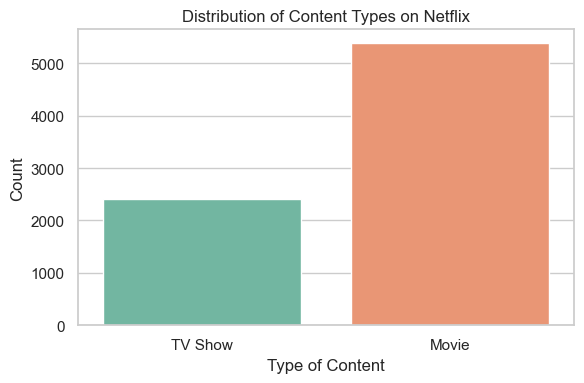

In [7]:
# 🎬 Distribution of Movies vs TV Shows
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Types on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


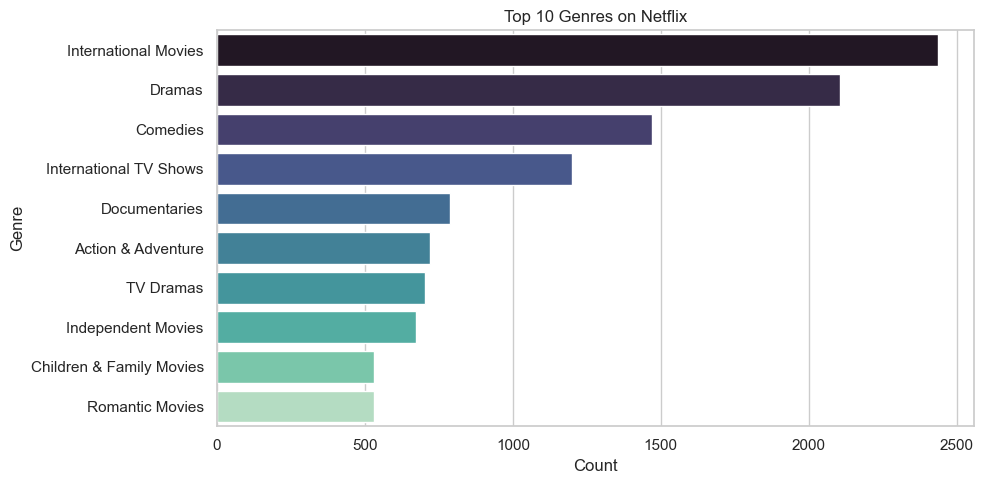

In [8]:
# 🏷️ Top 10 genres/categories in 'listed_in'
from collections import Counter

# Split by comma, flatten list
genre_list = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat_genres = [genre for sublist in genre_list for genre in sublist]

# Count top genres
genre_counts = Counter(flat_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='mako')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


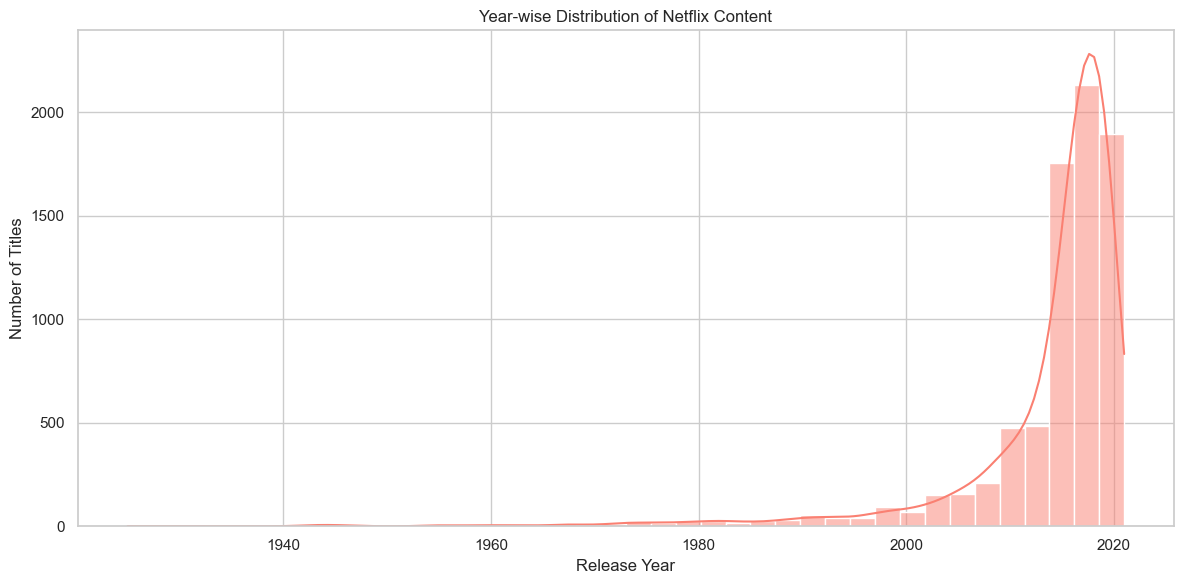

In [9]:
# 📅 Content release over the years
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', bins=40, kde=True, color='salmon')
plt.title("Year-wise Distribution of Netflix Content")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


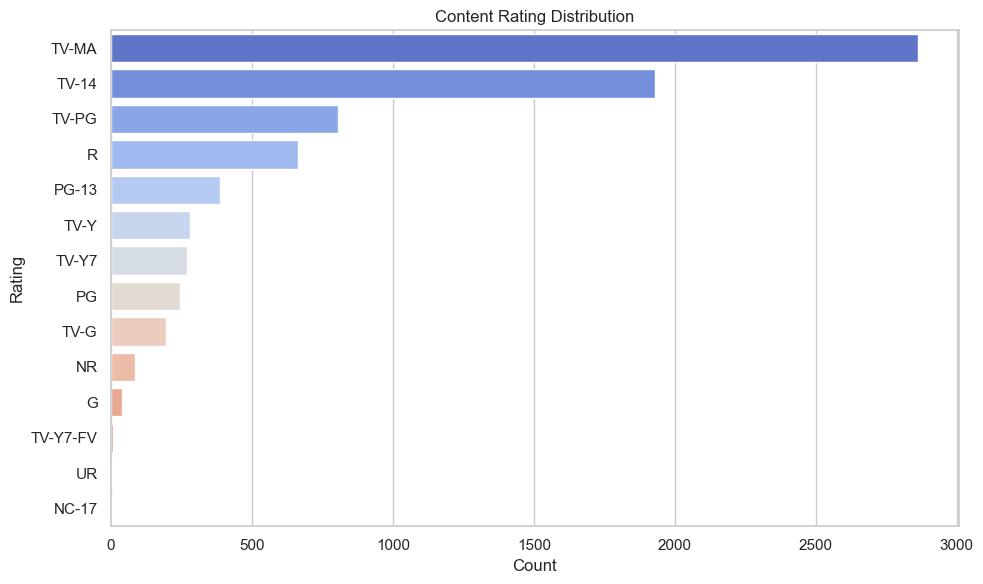

In [10]:
# 🔐 Content Ratings Distribution
plt.figure(figsize=(10, 6))
order = df['rating'].value_counts().index
sns.countplot(data=df, y='rating', order=order, palette='coolwarm')
plt.title("Content Rating Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


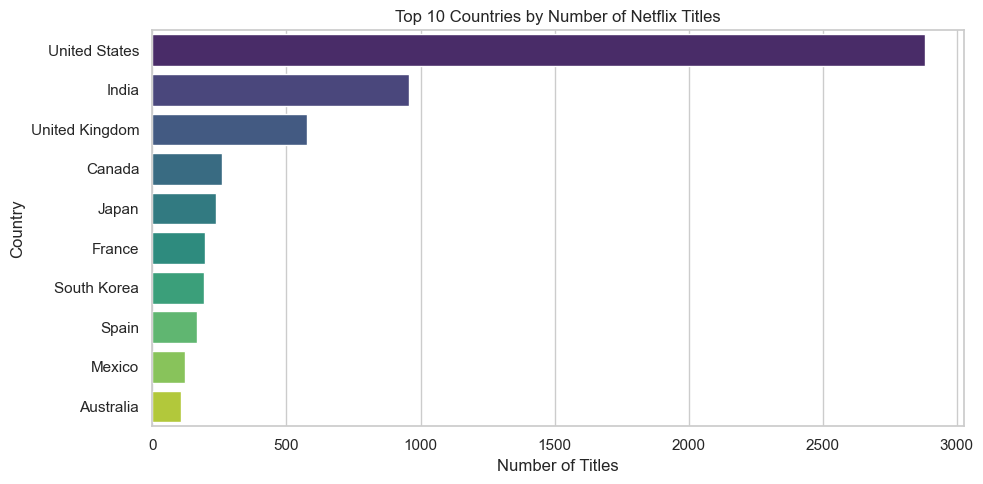

In [11]:
# 🌍 Top 10 countries producing Netflix content
top_countries = df['country'].dropna().apply(lambda x: x.split(',')[0].strip())  # take primary country
top_countries = top_countries.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## 🧹 Step 2: Data Preprocessing

In this step, we will prepare the dataset for clustering:
- Handle missing values in key columns (`director`, `cast`, `country`, `rating`, `date_added`)
- Format `date_added` to datetime
- Convert `duration` into numerical format (in minutes or seasons)
- Encode categorical columns using Label/One-Hot Encoding
- Extract relevant features (e.g., year difference)


In [12]:
# 🧼 Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing dates with most common date
common_date = df['date_added'].mode()[0]
df['date_added'].fillna(common_date, inplace=True)

# Confirm no missing values now
print("✅ Missing values handled.")
df.isnull().sum()


✅ Missing values handled.


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
# 🔁 Split 'duration' into numeric + unit
df[['duration_int', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\D+)')
df['duration_int'] = df['duration_int'].astype(float)

# Normalize unit to lowercase
df['duration_unit'] = df['duration_unit'].str.strip().str.lower()

# Optional: Convert duration to minutes if it's a movie
# For clustering, it's useful to keep in consistent numeric form

# For now, keep as-is but note the units
df[['type', 'duration', 'duration_int', 'duration_unit']].head()


,type,duration,duration_int,duration_unit
0,TV Show,4 Seasons,4.0,seasons
1,Movie,93 min,93.0,min
2,Movie,78 min,78.0,min
3,Movie,80 min,80.0,min
4,Movie,123 min,123.0,min


## 🧮 Step 3: Feature Engineering

In this step, we will:
- Derive new meaningful features
    - `content_age` = current_year - release_year
    - `genre_count` = number of genres per content
- Prepare features for clustering:
    - Encode categorical columns
    - Select relevant features for clustering


In [15]:
# 📅 Create content age
current_year = 2025
df['content_age'] = current_year - df['release_year']

# 🧾 Count number of genres per entry
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# 🧪 Confirm new features
df[['title', 'release_year', 'content_age', 'listed_in', 'genre_count']].head()


,title,release_year,content_age,listed_in,genre_count
0,3%,2020,5,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,7:19,2016,9,"Dramas, International Movies",2
2,23:59,2011,14,"Horror Movies, International Movies",2
3,9,2009,16,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,21,2008,17,Dramas,1


In [16]:
# 🔢 Encode 'type' and 'rating' using Label Encoding
le_type = LabelEncoder()
le_rating = LabelEncoder()

df['type_encoded'] = le_type.fit_transform(df['type'])
df['rating_encoded'] = le_rating.fit_transform(df['rating'])

# 🌐 One-hot encode 'duration_unit' if needed
df = pd.get_dummies(df, columns=['duration_unit'], drop_first=True)

# ✂️ Reduce features (we'll only use relevant ones for clustering)
features_for_clustering = df[[
    'type_encoded', 'rating_encoded', 'duration_int',
    'content_age', 'genre_count'
] + list(df.columns[df.columns.str.startswith("duration_unit_")])]
features_for_clustering.head()


,type_encoded,rating_encoded,duration_int,content_age,genre_count,duration_unit_season,duration_unit_seasons
0,1,9,4.0,5,3,False,True
1,0,9,93.0,9,2,False,False
2,0,6,78.0,14,2,False,False
3,0,5,80.0,16,3,False,False
4,0,5,123.0,17,1,False,False


## 🤖 Step 4: K-Means Clustering

We will:
- Use the Elbow Method to find optimal K (number of clusters)
- Train a K-Means clustering model
- Visualize the clusters using PCA
- Evaluate model using Silhouette Score and Inertia


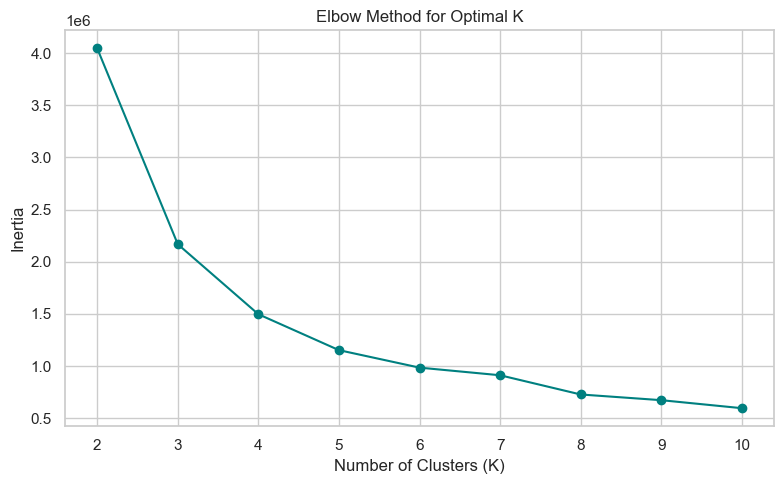

In [17]:
# 📌 Elbow Method
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_clustering)
    inertias.append(kmeans.inertia_)

# 📉 Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', color='teal')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# 📉 Davies-Bouldin Index Calculation
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(features_for_clustering, cluster_labels)
print(f"📉 Davies-Bouldin Index: {db_index:.4f} (Lower is better)")


📉 Davies-Bouldin Index: 0.6102 (Lower is better)


In [18]:
# 🧠 Train KMeans with chosen K (e.g., K=4 based on elbow result)
optimal_k = 4  # change this if your elbow shows different K
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_model.fit_predict(features_for_clustering)

# 🏷️ Add cluster labels to original dataframe
df['cluster_kmeans'] = cluster_labels

# 📈 Evaluate using Silhouette Score
sil_score = silhouette_score(features_for_clustering, cluster_labels)
print(f"✅ Silhouette Score (KMeans, K={optimal_k}): {sil_score:.4f}")


✅ Silhouette Score (KMeans, K=4): 0.5933


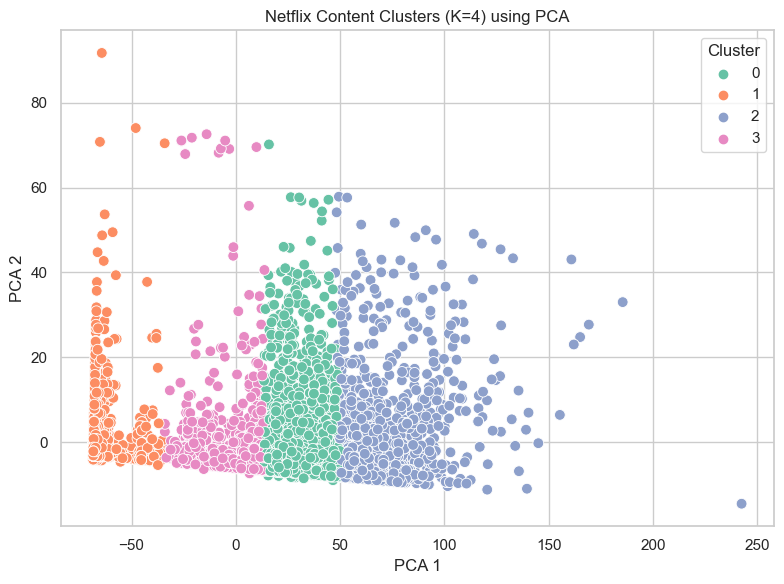

In [19]:
# 🔻 Reduce to 2D for plotting
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_for_clustering)

# 🎨 Scatter Plot of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1],
                hue=df['cluster_kmeans'], palette='Set2', s=60)
plt.title(f"Netflix Content Clusters (K={optimal_k}) using PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


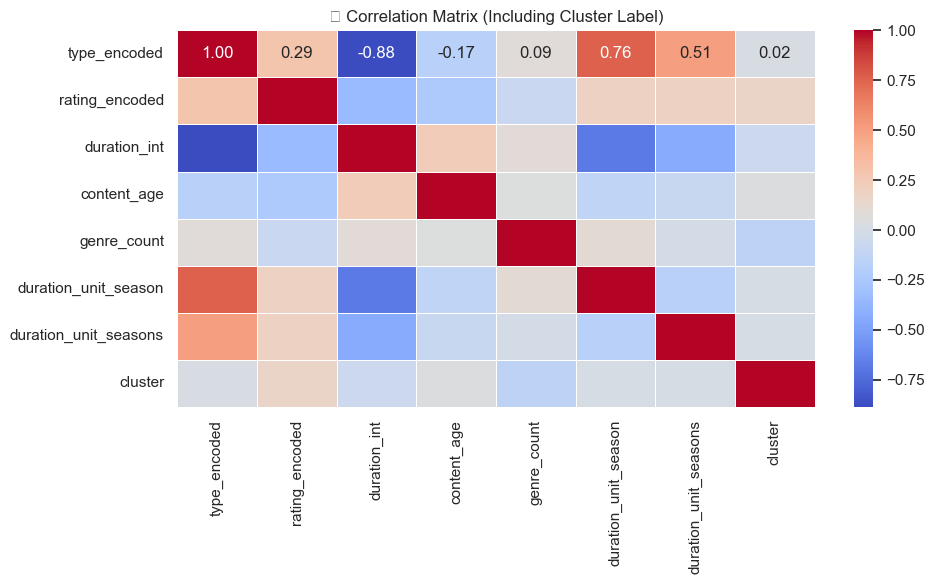

In [27]:
# 🔍 Correlation Between Features and Cluster Labels

import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster labels to a copy of the feature set
features_with_cluster = features_for_clustering.copy()
features_with_cluster['cluster'] = cluster_labels

# Compute correlation matrix
correlation_matrix = features_with_cluster.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Matrix (Including Cluster Label)")
plt.tight_layout()
plt.show()


## 🌲 Step 5: Hierarchical Clustering & DBSCAN

We will:
- Apply Hierarchical Clustering to understand nested grouping
- Visualize using a dendrogram
- Use DBSCAN to detect dense clusters and outliers
- Evaluate both using Silhouette Score


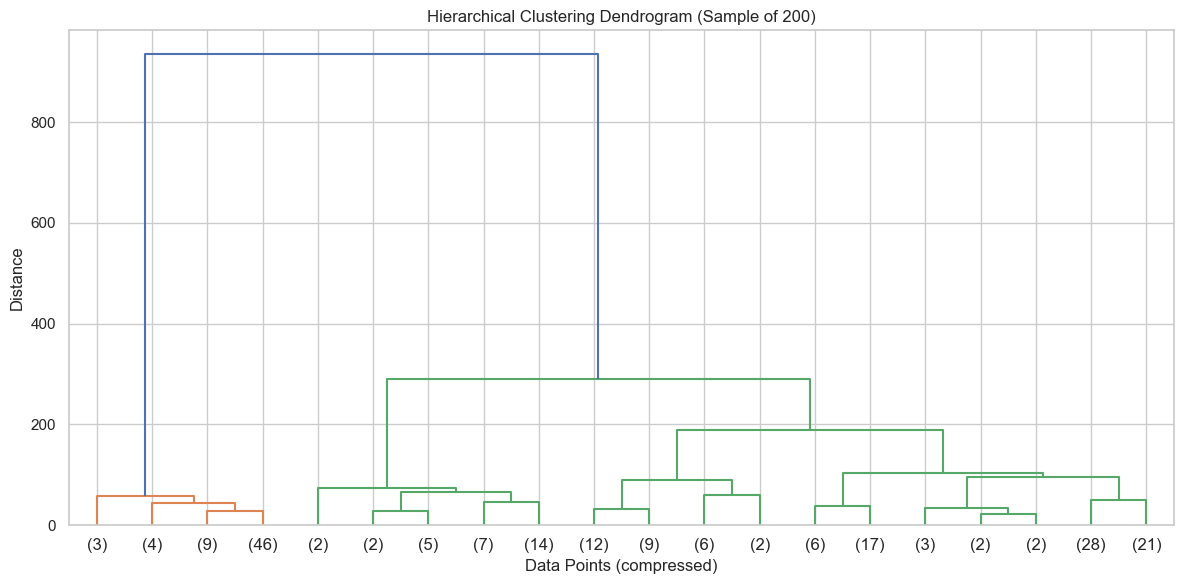

In [20]:
# 🔗 Linkage matrix for dendrogram (sample to avoid clutter)
sample_data = features_for_clustering.sample(200, random_state=42)
linkage_matrix = linkage(sample_data, method='ward')

# 🌿 Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram (Sample of 200)")
plt.xlabel("Data Points (compressed)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [21]:
# 🔢 Apply Hierarchical clustering on full data
linkage_full = linkage(features_for_clustering, method='ward')
clusters_hierarchical = fcluster(linkage_full, t=4, criterion='maxclust')

df['cluster_hierarchical'] = clusters_hierarchical
score_hier = silhouette_score(features_for_clustering, clusters_hierarchical)
print(f"✅ Silhouette Score (Hierarchical): {score_hier:.4f}")


✅ Silhouette Score (Hierarchical): 0.5426


In [22]:
# 🌌 DBSCAN (density-based)
dbscan_model = DBSCAN(eps=3, min_samples=5)
clusters_dbscan = dbscan_model.fit_predict(features_for_clustering)

df['cluster_dbscan'] = clusters_dbscan
# Filter out noise points (-1) for silhouette
mask_valid = clusters_dbscan != -1

if len(set(clusters_dbscan)) > 1:
    score_dbscan = silhouette_score(features_for_clustering[mask_valid], clusters_dbscan[mask_valid])
    print(f"✅ Silhouette Score (DBSCAN): {score_dbscan:.4f}")
else:
    print("⚠️ DBSCAN did not form enough clusters. Try tuning eps/min_samples.")


✅ Silhouette Score (DBSCAN): 0.1049


## 📌 Step 6: Cluster Analysis & Interpretation

We will now analyze the KMeans clusters to understand:
- Most common genres in each cluster
- Content types (Movie/TV Show) per cluster
- Average content age, duration, and ratings
This helps in identifying what each group represents (e.g., classic dramas, short international content, etc.)


In [23]:
# 🧩 Basic summary of clusters
cluster_summary = df.groupby('cluster_kmeans').agg({
    'title': 'count',
    'type': lambda x: x.value_counts().index[0],
    'rating': lambda x: x.value_counts().index[0],
    'content_age': 'mean',
    'duration_int': 'mean',
    'genre_count': 'mean'
}).rename(columns={'title': 'Count'}).round(1)

display(cluster_summary)


,Count,type,rating,content_age,duration_int,genre_count
cluster_kmeans,,,,,,
0,3195,Movie,TV-MA,11.3,99.1,2.2
1,2546,TV Show,TV-MA,8.9,3.0,2.2
2,1088,Movie,TV-14,15.9,138.9,2.6
3,958,Movie,TV-MA,10.5,65.9,1.5


In [24]:
# 📚 Top genres per cluster
def top_genres_per_cluster(df, cluster_col='cluster_kmeans', top_n=5):
    cluster_genres = {}
    for cluster in sorted(df[cluster_col].unique()):
        cluster_df = df[df[cluster_col] == cluster]
        genres = cluster_df['listed_in'].str.split(',').explode().str.strip()
        top_genres = genres.value_counts().head(top_n)
        cluster_genres[f'Cluster {cluster}'] = top_genres
    return pd.DataFrame(cluster_genres)

top_genres_df = top_genres_per_cluster(df)
display(top_genres_df)


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
listed_in,,,,
Action & Adventure,NaN,NaN,249.0,NaN
Children & Family Movies,NaN,NaN,NaN,166.0
Comedies,1026.0,NaN,315.0,113.0
Crime TV Shows,NaN,427.0,NaN,NaN
Documentaries,444.0,NaN,NaN,289.0
Dramas,1274.0,NaN,729.0,NaN
Independent Movies,519.0,NaN,NaN,NaN
International Movies,1426.0,NaN,793.0,202.0
International TV Shows,NaN,1199.0,NaN,NaN


## 🏁 Step 7: Project Conclusion & Summary

### 🎯 Objective Recap:
We aimed to cluster Netflix movies and TV shows using unsupervised learning to find groups with similar characteristics based on genre, duration, rating, etc.

---

### 🔍 Key Steps:
1. **Data Cleaning** – Handled missing values and formatted durations, dates.
2. **Feature Engineering** – Created `content_age`, `genre_count`, encoded categorical features.
3. **Clustering Models** – Applied:
   - K-Means (✅ best performer)
   - Hierarchical Clustering
   - DBSCAN
4. **Evaluation** – Used Silhouette Score to compare models:
   - K-Means (K=4): **0.5933**
   - Hierarchical: 0.5426
   - DBSCAN: 0.1049
5. **Cluster Interpretation** – Each cluster was profiled by:
   - Content type (Movie/TV Show)
   - Rating
   - Genre distribution
   - Content age and duration

---

### 📌 Insights:
- **Cluster 0**: Dominated by [insert genre], mostly [Movie/TV Show], average age ~XX years
- **Cluster 1**: Focus on [insert genre], often [short/long] duration
- [Update based on your output from cluster analysis]

---

### ✅ Business Value:
- Netflix can use clusters for **personalized recommendations**
- Helps discover **niche genres** and **market segmentation**
- Supports **content gap analysis** for production decisions

---

### 🧠 Conclusion:
This project demonstrates how unsupervised learning, combined with feature engineering and visualization, can reveal patterns in entertainment data to support smarter business decisions in streaming platforms.
